# 层次聚类 Lab
在此 notebook 中，我们将使用 sklearn 对[鸢尾花数据集](https://archive.ics.uci.edu/ml/datasets/iris)执行层次聚类。该数据集包含 4 个维度/属性和 150 个样本。每个样本都标记为某种鸢尾花品种（共三种）。

在此练习中，我们将忽略标签和基于属性的聚类，并将不同层次聚类技巧的结果与实际标签进行比较，看看在这种情形下哪种技巧的效果最好。然后，我们将可视化生成的聚类层次。

## 1. 导入鸢尾花数据集

In [1]:
from sklearn import datasets

iris = datasets.load_iris()

查看数据集中的前 10 个样本

In [2]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 2. 聚类
现在使用 sklearn 的 [```AgglomerativeClustering```](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) 进行层次聚类

In [4]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering
# Ward is the default linkage algorithm, so we'll start with that
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(iris.data)

并且尝试完全连接法和平均连接法

**练习**：

* 通过完全连接法进行层次聚类，将预测的标签存储在变量 ```complete_pred``` 中
* 通过平均连接法进行层次聚类，将预测的标签存储在变量 ```avg_pred``` 中

In [5]:
# Hierarchical clustering using complete linkage
# TODO: Create an instance of AgglomerativeClustering with the appropriate parameters
complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
# Fit & predict
# TODO: Make AgglomerativeClustering fit the dataset and predict the cluster labels
complete_pred = complete.fit_predict(iris.data)

# Hierarchical clustering using average linkage
# TODO: Create an instance of AgglomerativeClustering with the appropriate parameters
avg = AgglomerativeClustering(n_clusters=3, linkage="average")
# Fit & predict
# TODO: Make AgglomerativeClustering fit the dataset and predict the cluster labels
avg_pred = avg.fit_predict(iris.data)

为了判断哪个聚类结果与样本的原始标签更匹配，我们可以使用 ```adjusted_rand_score```，它是一个*外部聚类有效性指标*，分数在 -1 到 1 之间，1 表示两个聚类在对数据集中的样本进行分组时完全一样（无论每个聚类分配的标签如何）。

在这门课程的稍后部分会讨论聚类有效性指标。

In [6]:
from sklearn.metrics import adjusted_rand_score

ward_ar_score = adjusted_rand_score(iris.target, ward_pred)

**练习**：

* 计算通过完全连接法和平均连接法得出的聚类的调整离差平方和(ward)分数

In [7]:
# TODO: Calculated the adjusted Rand score for the complete linkage clustering labels
complete_ar_score = adjusted_rand_score(iris.target, complete_pred)

# TODO: Calculated the adjusted Rand score for the average linkage clustering labels
avg_ar_score = adjusted_rand_score(iris.target, avg_pred)

哪个算法的调整兰德分数更高？

In [8]:
print( "Scores: \nWard:", ward_ar_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Ward: 0.7311985567707745 
Complete:  0.64225125183629 
Average:  0.7591987071071522


## 3. 标准化对聚类的影响

可以改进该聚类结果吗？

我们再看看数据集

In [9]:
iris.data[:15]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2]])

查看该数据集后，可以看出第四列的值比其他列要小，因此它的方差对聚类处理流程的影响更新（因为聚类是基于距离的）。我们对数据集进行[标准化](https://en.wikipedia.org/wiki/Feature_scaling) ，使每个维度都位于 0 到 1 之间，以便在聚类流程中具有相等的权重。

方法是让每列减去最小值，然后除以范围。

sklearn 提供了一个叫做 ```preprocessing.normalize()``` 的实用工具，可以帮助我们完成这一步

In [10]:
from sklearn import preprocessing

normalized_X = preprocessing.normalize(iris.data)
normalized_X[:10]

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451]])

现在所有列都在 0 到 1 这一范围内了。这么转换之后对数据集进行聚类会形成更好的聚类吗？（与样本的原始标签更匹配）

In [11]:
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(normalized_X)

complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
complete_pred = complete.fit_predict(normalized_X)

avg = AgglomerativeClustering(n_clusters=3, linkage="average")
avg_pred = avg.fit_predict(normalized_X)


ward_ar_score = adjusted_rand_score(iris.target, ward_pred)
complete_ar_score = adjusted_rand_score(iris.target, complete_pred)
avg_ar_score = adjusted_rand_score(iris.target, avg_pred)

print( "Scores: \nWard:", ward_ar_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Ward: 0.8856970310281228 
Complete:  0.644447235392006 
Average:  0.5583714437541352


## 4. 通过 scipy 进行谱系图可视化

我们来可视化分数最高的聚类结果。

为此，我们需要使用 Scipy 的 [```linkage```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) 函数再次进行聚类，以便获取稍后用来可视化层次关系的连接矩阵

In [12]:
# Import scipy's linkage function to conduct the clustering
from scipy.cluster.hierarchy import linkage

# Specify the linkage type. Scipy accepts 'ward', 'complete', 'average', as well as other values
# Pick the one that resulted in the highest Adjusted Rand Score
linkage_type = 'ward'

linkage_matrix = linkage(normalized_X, linkage_type)

使用 scipy 的 [dendrogram](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html) 函数进行绘制

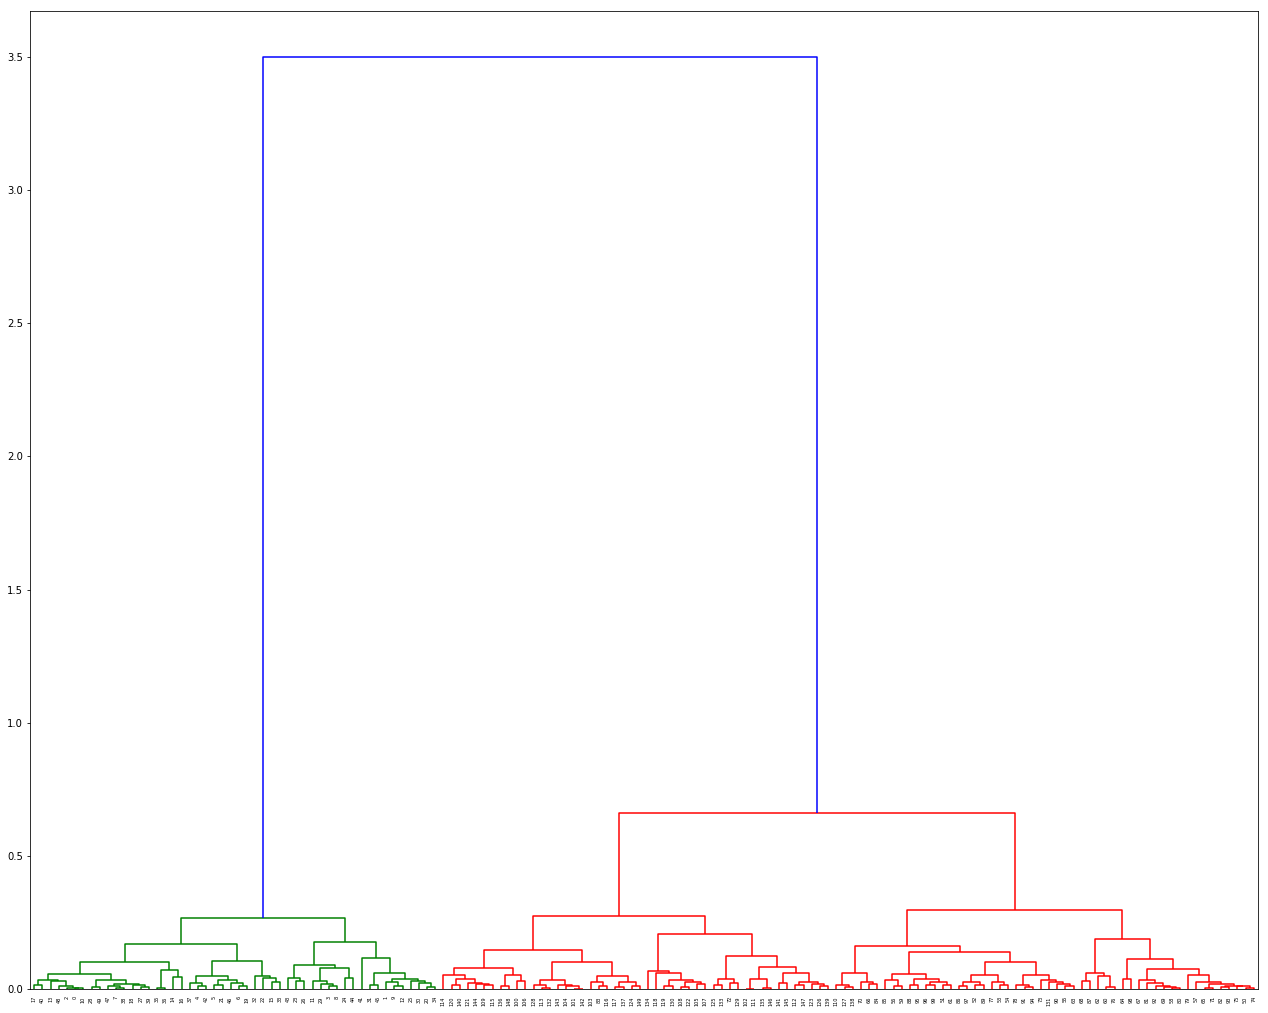

In [13]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# 为notebook提供更加漂亮的可视化
%matplotlib inline

plt.figure(figsize=(22,18))

# plot using 'dendrogram()'
dendrogram(linkage_matrix)

plt.show()

## 5. 通过 Seaborn 的 ```clustermap``` 进行可视化 

python 的 [seaborn](http://seaborn.pydata.org/index.html) 绘制库可以绘制[聚类图](http://seaborn.pydata.org/generated/seaborn.clustermap.html)，它是一种更详细地可视化数据集的谱系图。它也会进行聚类，因此我们只需传入数据集和想要的连接类型，它将在后台使用 scipy 进行聚类

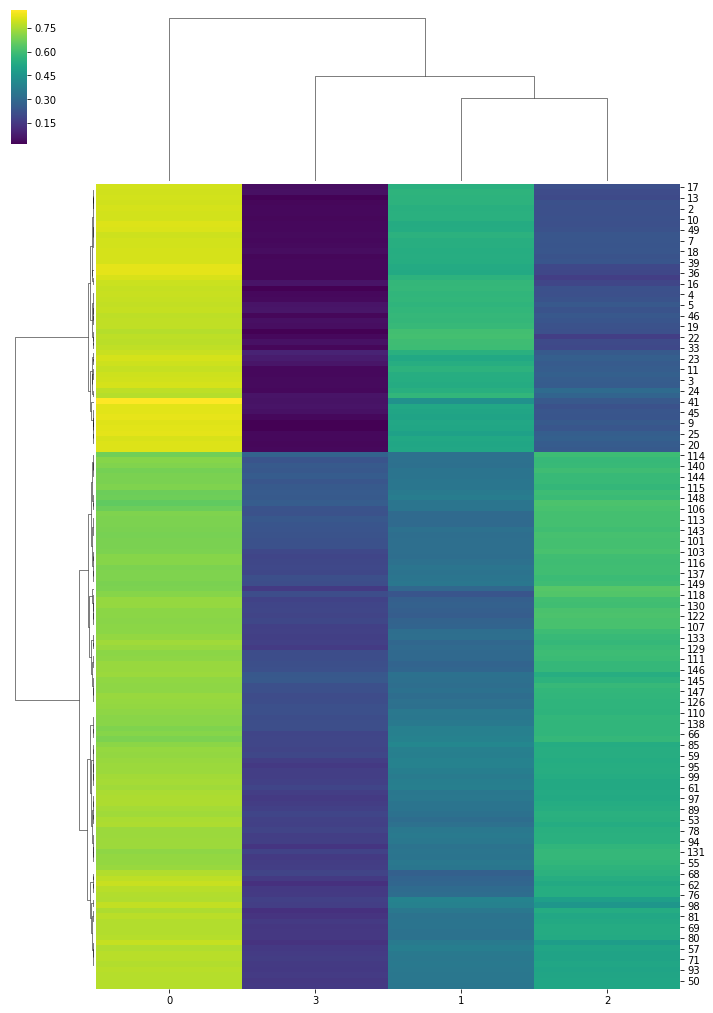

In [14]:
import seaborn as sns

sns.clustermap(normalized_X, figsize=(12,18), method=linkage_type, cmap='viridis')

# Expand figsize to a value like (18, 50) if you want the sample labels to be readable
# Draw back is that you'll need more scrolling to observe the dendrogram

plt.show()

查看维度的颜色后，能够发现三种鸢尾花之间的区别吗？你应该至少能够发现一种鸢尾花与其他两种完全不同（位于图形的顶部三分之一区域）。